#**EDA and Cleaning for the 38K picture**

##load the utility_38k

In [1]:
# you can adjust the way you import utility_38k as you like
# im using colab and mounting to my google drive
import sys
from google.colab import drive
drive.mount('/content/drive')

sys.path.append('/content/drive/MyDrive/attendance_system')
import utility_38k


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from utility_38k import dataCleaner_38K

##load the dataframe and understand the schema

In [3]:
df_38k = dataCleaner_38K.loadDF()
print(df_38k.info())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image1  38000 non-null  object
 1   image2  38000 non-null  object
 2   target  38000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 890.8+ KB
None


38k instance with 3 col [image1, image2, target(0 or 1)]

## Explore the data

###Remove corrupted or invalid images from a dataset where images are in bytes format.

In [4]:
df_38k = dataCleaner_38K.remove_corrupted_images_bytes(dataCleaner_38K,df_38k)

Removed 0 corrupted rows.


No corrupted images.

###visualize a sample from our data

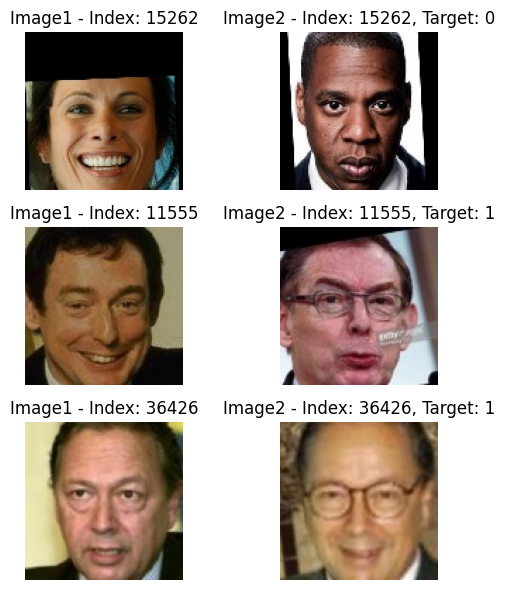

In [8]:
dataCleaner_38K.visualize_sample(dataCleaner_38K,df_38k)

###check for grayscale images and if there convert them to rgb

In [6]:
df = dataCleaner_38K.process_gray_rgb(dataCleaner_38K,df_38k)

0 img out of 76000 were gray scale.
